In [1]:
import pandas as pd
import numpy as np

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle

In [3]:
with open('../model/kmeans.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
with open('../model/tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [5]:
abs1 = """
Abstract The etiologic basis for the vast majority of cases of congenital heart disease remains largely undefined. 
Viruses have been considered to be likely candidates since the recognition of the association between intrauterine 
rubella and congenital heart disease. Although the pathogenesis of cardiovascular defects is poorly understood, 
information gained from the study of congenital rubella syndrome suggests that mechanisms such as focal endothelial 
cell damage, resulting in obliteration of vascular supply, decreased growth rate, and shortened survival time of 
certain cells, and disturbed DNA replication in cells whose chromosomes were damaged secondary to the effects of 
virus replication may be operative in the production of defects in the developing fetus. In addition to rubella there 
is suggestive, but not conclusive, evidence that Coxsackie B3 and B4 virus infections during pregnancy can result in 
the birth of infants with a variety of types of congenital heart lesions and that intrauterine mumps virus infection 
may be etiologically related to the postnatal development of endocardial fibroelastosis (EFE). Although there are a 
number of other viruses that are potential etiologic agents of congenital heart disease, the current status of 
information is inadequate to allow even suggestive associations to be made. The most profitable areas for future 
investigation appear to be: (1) the epidemiology of congenital heart disease, (2) prospective studies of the 
association of maternal viral infection with abnormal offspring, (3) the in-depth virologic investigation of the 
infant with a cardiac defect, and (4) the development of experimental animal models of congenital heart disease. 
Successful control of virus-induced congenital heart disease will depend on the results of these investigations and 
the development of vaccines against the identified causative viruses and/or safe and effective antiviral chemotherapy 
for the woman in early gestation who is infected with a known teratogenic agent.
"""

In [82]:
abs2 = """
Abstract Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE), were evaluated for 
immunologic reactivity to previous antigenic challenges, including primary immunization with a foreign antigen, 
keyhole limpet hemocyanin (KLH). These two women had lived together for all of their 58 years and neither was 
receiving anti-inflammatory or immunosuppressive drugs at the time of these studies. Both twins demonstrated 
comparable 7S and 198 humoral antibody response to KLH, as well as similar viral antibody titers. However, the twin
with SLE was anergic to common antigens, streptokinase-streptodornase, Trichophyton and Candida; furthermore delayed 
hypersensitivity to KLH did not develop after immunization. This observed discrepancy between humoral and cellular 
immunity in genetically similar subjects may be significant in the pathogenesis of SLE.
"""

In [83]:
abs3 = """
Abstract Upper respiratory tract infections are the most common types of infectious diseases among adults. It is 
estimated that each adult in the United States experiences two to four respiratory infections annually. The morbidity 
of these infections is measured by an estimated 75 million physician visits per year, almost 150 million days lost 
from work, and more than $10 billion In costs for medical care. Serotypes of the rhinoviruses account for 20 to 30 
percent of episodes of the common cold. However, the specific causes of most upper respiratory infections are 
undefined. Pneumonia remains an important cause of morbidity and mortality for nonhospitalized adults despite the 
widespread use of effective antimicrobial agents. There are no accurate figures on the number of episodes of 
pneumonia that occur each year in ambulatory patients. In younger adults, the atypical pneumonia syndrome Is the most 
common clinical presentation; Mycoplasma pneumoniae is the most frequently Identified causative agent. Other less 
common agents include Legionelia pneumophila, influenza viruses, adenoviruses, and Chiamydia. More than half a 
million adults are hospitalized each year with pneumonia. Persons older than 65 years of age have the highest rate of 
pneumonia admissions, 11.5 per 1,000 population. Pneumonia ranks as the sixth leading cause of death in the United 
States. The pathogens responsible for community-acquired pneumonlas are changing. Forty years ago, Streptococcus 
pneumoniae accounted for the majority of infections. Today, a broad array of community-acquired pathogens have been 
implicated as etiologic agents Including Leglonella species, gram-negative bacilli, Hemophilus influenzae, 
Staphylococcus aureus and nonbacterial pathogens. Given the diversity of pathogenic agents, it has become imperative 
for clinicians to establish a specific etiologic diagnosis before initiating therapy or to consider the diagnostic 
possibilities and treat with antimicrobial agents that are effective against the most likely pathogens.
"""

In [84]:
abs4 = """
Abstract Our understanding of the pathogenesis of infectious, especially bacterial, diarrhea has increased 
dramatically. New etiologic agents, mechanisms, and diseases have become known. For example, Escherichia coli 
serogroup 0157 is now known to cause acute hemorrhagic colitis. Also, E. coli serogroups that produce Shiga toxin are 
recognized as etiologic agents in the hemolytic-uremic syndrome. The production of bacterial diarrhea has two major 
facets, bacterial-mucosal interaction and the induction of intestinal fluid loss by enterotoxins. Bacterial-mucosal 
interaction can be described in stages: (1) adherence to epithelial cell microvilli, which is often promoted by or 
associated with pill; (2) close adherence (enteroadherence), usually by classic enteropathogenic E. coli, to mucosal 
epithelial cells lacking microvilli; and (3) mucosal invasion, as with Shigella and Salmonella infections. Further 
large strides in understanding infectious diarrhea are likely with the cloning of virulence genes if additional 
host-specific animal pathogens become available for study.
"""

In [26]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

# Experimenting

In [31]:
bow = vectorizer.transform([abs1])

In [36]:
print(bow)

  (0, 434587)	0.0673182420644212
  (0, 426644)	0.1686863126805504
  (0, 426643)	0.21074280805897275
  (0, 426565)	0.08335521019801752
  (0, 426482)	0.05325757800534894
  (0, 423672)	0.04342850650879513
  (0, 423572)	0.05947179973421697
  (0, 423294)	0.029790519259695166
  (0, 422298)	0.06676620554053883
  (0, 416610)	0.0346274721015864
  (0, 416190)	0.06116175021696181
  (0, 412830)	0.02858470967560365
  (0, 403756)	0.017242253667494434
  (0, 399295)	0.08654907218454312
  (0, 393737)	0.05704735285537139
  (0, 392030)	0.04412789634996064
  (0, 391562)	0.04408093891755196
  (0, 388923)	0.031143308487071083
  (0, 388921)	0.10007476350971399
  (0, 388641)	0.036938202474735206
  (0, 386218)	0.016443636417764397
  (0, 386194)	0.026084617258050447
  (0, 383403)	0.03908312642876201
  (0, 369127)	0.05751070203784838
  (0, 363582)	0.03730788084584393
  :	:
  (0, 110391)	0.06556783322756787
  (0, 107952)	0.02522837942187421
  (0, 107241)	0.07212444074590903
  (0, 107203)	0.033362783451906644
  (0

In [51]:
bow.shape

(1, 444052)

In [53]:
sum_words = bow.sum(axis=0)

In [71]:
sum_words[sum_words > 0]

matrix([[0.05131838, 0.03837681, 0.02611877, 0.038068  , 0.03786913,
         0.02905685, 0.05070895, 0.07258387, 0.03189341, 0.0357091 ,
         0.07807613, 0.04735642, 0.06298444, 0.06883482, 0.02970663,
         0.04509445, 0.03538068, 0.05375381, 0.05882128, 0.02550149,
         0.06741518, 0.03336278, 0.07212444, 0.02522838, 0.06556783,
         0.06025985, 0.05229958, 0.56950955, 0.02546362, 0.02720329,
         0.02446869, 0.04570358, 0.05706599, 0.04461795, 0.03996976,
         0.07719337, 0.03220896, 0.03398969, 0.03715073, 0.09273237,
         0.25581546, 0.05148431, 0.04340537, 0.03124966, 0.07004875,
         0.02436514, 0.02364493, 0.08221527, 0.06642353, 0.05673876,
         0.16671042, 0.02831667, 0.02350173, 0.0764863 , 0.04658804,
         0.02758096, 0.04402042, 0.0740917 , 0.03050797, 0.31791318,
         0.03060694, 0.05102042, 0.02673128, 0.06160854, 0.06444002,
         0.04983452, 0.09892823, 0.05697336, 0.04549875, 0.17309814,
         0.0685209 , 0.03920418, 0

In [61]:
words = sorted([
    (word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items() if sum_words[0, idx] != 0
], key=lambda x: x[1], reverse=True)

In [69]:
print('Top 10 words')
words[:10]

Top 10 words


[('congenital', 0.5695095484238162),
 ('heart', 0.31791317701029603),
 ('disease', 0.25581545873099903),
 ('rubella', 0.24664581454053092),
 ('virus', 0.21074280805897275),
 ('intrauterine', 0.17309814436908624),
 ('viruses', 0.1686863126805504),
 ('etiologic', 0.16671042039603504),
 ('replication', 0.10053177644893106),
 ('suggestive', 0.10007476350971399)]

# Convert to function

In [70]:
import typing

In [148]:
def top_n_words(s: typing.List[str], vec, n: int = None) -> typing.List[typing.Tuple[str, float]]:
    bow = vec.transform(s)
    sum_words = bow.sum(axis=0)
    words = [(w, sum_words[0, i]) for w, i in vec.vocabulary_.items() if sum_words[0, i] != 0]
    words = sorted(words, key=lambda x: x[1], reverse=True)
    return words[:n]

In [105]:
top_n_words([abs1], vectorizer, 5)

[('congenital', 0.5695095484238162),
 ('heart', 0.31791317701029603),
 ('disease', 0.25581545873099903),
 ('rubella', 0.24664581454053092),
 ('virus', 0.21074280805897275)]

In [98]:
top_n_words([abs2], vectorizer, 5)

[('klh', 0.46029746876771527),
 ('sle', 0.2940972247035509),
 ('humoral', 0.27988391316159317),
 ('immunization', 0.224879947274281),
 ('antibody', 0.22095324279476805)]

In [153]:
top_n_words([abs3], vectorizer, 5)

[('pneumonia', 0.46677642359350113),
 ('infections', 0.30436941855490124),
 ('pathogens', 0.2550067485012508),
 ('adults', 0.2535938232055195),
 ('agents', 0.20230869241880514)]

In [108]:
top_n_words([abs1, abs2, abs3, abs4], vectorizer, 10)

[('etiologic', 0.5832703914918796),
 ('congenital', 0.5695095484238162),
 ('pneumonia', 0.46677642359350113),
 ('klh', 0.46029746876771527),
 ('mucosal', 0.46006056741034707),
 ('infections', 0.4428284482258397),
 ('agents', 0.34850184418164015),
 ('pathogens', 0.34034464093679934),
 ('diarrhea', 0.3390591255561547),
 ('heart', 0.31791317701029603)]

In [122]:
top_words = pd.DataFrame(top_n_words([abs1, abs2, abs3, abs4], vectorizer, 10)) \
.rename(columns={0: 'word', 1: 'freq'})
# .set_index('word')

In [123]:
top_words

,word,freq
0,etiologic,0.583270
1,congenital,0.569510
2,pneumonia,0.466776
3,klh,0.460297
4,mucosal,0.460061
5,infections,0.442828
6,agents,0.348502
7,pathogens,0.340345
8,diarrhea,0.339059
9,heart,0.317913


In [157]:
top_words.set_index('word').values

array([[0.58327039],
       [0.56950955],
       [0.46677642],
       [0.46029747],
       [0.46006057],
       [0.44282845],
       [0.34850184],
       [0.34034464],
       [0.33905913],
       [0.31791318]])

In [159]:
top_words_2 = pd.DataFrame(top_n_words([abs1, abs2, abs3, abs4], vectorizer, 10)).set_index(0)

In [162]:
top_words_2.sort_values(1, ascending=False)

,1
0,
etiologic,0.583270
congenital,0.569510
pneumonia,0.466776
klh,0.460297
mucosal,0.460061
infections,0.442828
agents,0.348502
pathogens,0.340345
diarrhea,0.339059


In [146]:
sns.set(rc={'figure.figsize':(12,8)})

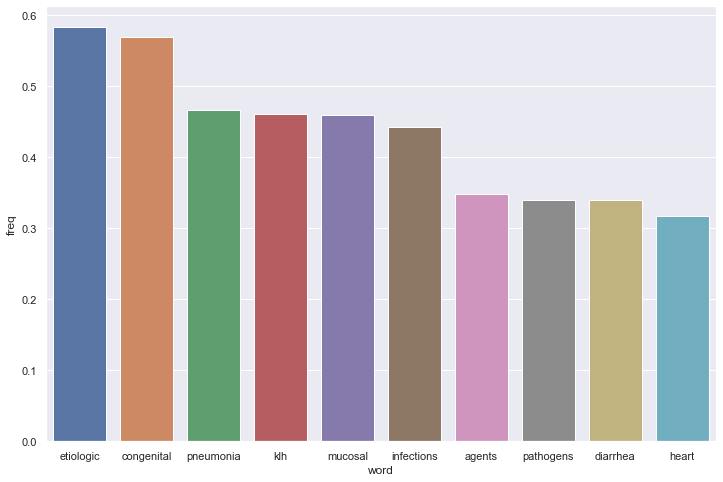

In [147]:
sns.barplot(x='word', y='freq', data=top_words)